In [1]:
#导入所使用的包
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
F:\Anaconda2019_07\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


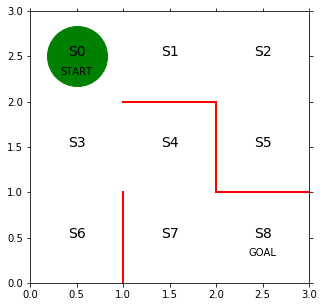

In [2]:
#迷宫的初始位置

#声明图的大小以及图的变量名
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

#画出红色的墙壁
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

#画出表示状态的文字S0-S8
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

#设定画图的范围
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

#当前位置S0用绿色圆圈画出
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
#设定参数θ的初始值theta_0，用于确定初始方案

#行为状态0-7，列为↑，→，↓，←表示的移动方向
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8是目标，无策略
                    ])

In [4]:
#策略参数theta根据softmax函数转换为行动策略π的定义


def softmax_convert_into_pi_from_theta(theta):
    '''根据softmax函数计算比率'''

    beta = 1.0
    [m, n] = theta.shape  # 求得theta矩阵的大小
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # 将theta转换为exp(theta)

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # 简单地计算比率

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # 用softmax计算比率

    pi = np.nan_to_num(pi)  # 将nan转换为0

    return pi

In [5]:
# 求得初始策略pi_0
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [6]:
# 定义求取动作a以及1步移动后的状态s的函数


def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # 根据pi[s,:]的概率来选择direction
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 向上移动时，状态数减3
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 向右移动时状态的数字增加1
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 向下移动时状态的数字增加3
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 向左移动时状态的数字减少1

    return [action, s_next]

In [7]:
# 定义求解迷宫问题的函数，它输出状态和动作


def goal_maze_ret_s_a(pi):
    s = 0  #开始地点
    s_a_history = [[0, np.nan]]  # 记录智能体移动轨迹的列表

    while (1):  # 直至到达目标的路径
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 代入当前状态（即目前最后一个状态index=-1）的动作

        s_a_history.append([next_s, np.nan])
        # 代入下一个状态，由于还不知道其动作，用nan表示

        if next_s == 8:  # 到达目标地点终止
            break
        else:
            s = next_s

    return s_a_history

In [11]:
# 用初始策略求解迷宫问题
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("求解迷宫问题所需步数" + str(len(s_a_history) - 1) )

[[0, 2], [3, 1], [4, 3], [3, 0], [0, 1], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 0], [0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 2], [7, 0], [4, 3], [3, 0], [0, 2], [3, 0], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]
求解迷宫问题所需步数42


In [12]:
# 定义theta的更新函数


def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 学習率
    T = len(s_a_history) - 1  # 到达目标的总步数

    [m, n] = theta.shape  # ttheta矩阵的大小
    delta_theta = theta.copy()  # 生成初始的delta_theta，由于指针原因不能直接使用delta_theta=theta

    # 求取delta_theta的各元素
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # theta不是nan时

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 从列表中取出状态i

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 取出状态i下应该采取的动作j

                N_i = len(SA_i)  # 状态i下动作的总次数
                N_ij = len(SA_ij)  # 状态i下采取动作j的次数
                
                # 初版では符号の正負に間違いがありました（修正日：180703）
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [13]:
# 策略更新
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49821429 0.50178571 0.        ]
 [0.         0.50059524 0.         0.49940476]
 [0.         0.         0.5        0.5       ]
 [0.33386264 0.33306868 0.33306868 0.        ]
 [0.         0.         0.50059524 0.49940476]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.50059524 0.49940476 0.         0.        ]]


In [14]:
# 策略梯度法求解迷宫问题

# 初版で、def update_thetaに間違いがあった関係で、終了条件を変更します（修正日：180703）
#stop_epsilon = 10**-8  # 10^-8よりも方策に変化が少なくなったら学習終了とする
stop_epsilon = 10**-4  # 策略的变化＜10^-4，则结束学习


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # 重复，直到is_continue为False
    s_a_history = goal_maze_ret_s_a(pi)  # 由策略π搜索迷宫探索历史
    new_theta = update_theta(theta, pi, s_a_history)  # 更新参数Θ
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 更新参数π

    print(np.sum(np.abs(new_pi - pi)))  # 输出策略的变化
    print("求解迷宫问题所需要的步数" + str(len(s_a_history) - 1) )

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.024719851682297123
求解迷宫问题所需要的步数20
0.01422225303355934
求解迷宫问题所需要的步数40
0.005831612498252092
求解迷宫问题所需要的步数98
0.01220238056017664
求解迷宫问题所需要的步数64
0.014104292025553689
求解迷宫问题所需要的步数48
0.012068801041919597
求解迷宫问题所需要的步数70
0.04864979540437325
求解迷宫问题所需要的步数4
0.04026622617023473
求解迷宫问题所需要的步数6
0.010056850026400332
求解迷宫问题所需要的步数26
0.009015453757320269
求解迷宫问题所需要的步数74
0.016065347074748937
求解迷宫问题所需要的步数12
0.0063566109247518154
求解迷宫问题所需要的步数34
0.015373786867890649
求解迷宫问题所需要的步数14
0.00973064383151867
求解迷宫问题所需要的步数44
0.024733340391611014
求解迷宫问题所需要的步数8
0.018361929119706633
求解迷宫问题所需要的步数16
0.013996154666042093
求解迷宫问题所需要的步数26
0.00872131447512342
求解迷宫问题所需要的步数58
0.00800753390767961
求解迷宫问题所需要的步数78
0.011464132673891458
求解迷宫问题所需要的步数54
0.007544070753066567
求解迷宫问题所需要的步数78
0.01546049238657482
求解迷宫问题所需要的步数30
0.01595980483842413
求解迷宫问题所需要的步数28
0.024025089573213698
求解迷宫问题所需要的步数8
0.01079553540802003
求解迷宫问题所需要的步数100
0.02365606595630998
求解迷宫问题所需要的步数10
0.02341636535841174
求解迷宫问题所需要的步数12
0.009125503164312265
求解迷宫问题所需要的步数36
0.0106

In [15]:
# 确认最终的策略
np.set_printoptions(precision=3, suppress=True)  # 设置有效位数为3，不显示指数
print(pi)

[[0.    0.015 0.985 0.   ]
 [0.    0.305 0.    0.695]
 [0.    0.    0.451 0.549]
 [0.009 0.982 0.01  0.   ]
 [0.    0.    0.982 0.018]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.014 0.986 0.    0.   ]]


In [16]:
# 可视化智能体的移动
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 初始化背景图像
    line.set_data([], [])
    return (line,)


def animate(i):
    # 每一帧画面内容
    state = s_a_history[i][0]  # 画出现在的场景
    x = (state % 3) + 0.5  # 状态的x坐标为状态除以3的余数加上0。5
    y = 2.5 - int(state / 3)  # 状态的y坐标为2.5减去（状态数除以3）
    line.set_data(x, y)
    return (line,)


#　使用初始化函数和每帧中的绘图函数来生成动画
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())